출처 : https://dataitgirls2.github.io/10minutes2pandas/

## pandas overview

### 고수준의 (객체)형태를 목표로한다.(Object Oriented Programming)
    * 테이블 형식 데이터
    * 시계열 데이터
    * 임의의 행열 데이터
    * 관찰 / 통계 데이터
### Series(1차원), DataFrame(2차원)의 주요 데이터 구조를 지원
    * Numpy기반


##### 참조 : 기본족으로 R과 SQL의 기본적인 개념과 차별점이 없는 이론적 배경은 설명에서 제외시켰다.

In [1]:
# 주요 페캐지 import
import pandas as pd
import numpy as np
import matplotlib as plt 

In [2]:
# Series : 구체적으로는 List type을 Series Type으로 치환시킨 것이라 이해
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
# 1)__ Datetime _index / Lable이 있는 열을 통해 numpy 배열을 전달
# 2)__ Dataframe
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.rand(6,4), index= dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,0.801957,0.031009,0.394189,0.819407
2013-01-02,0.441287,0.779447,0.613540,0.307212
2013-01-03,0.373687,0.322487,0.998927,0.925101
2013-01-04,0.913378,0.346914,0.182500,0.813101
2013-01-05,0.093346,0.823614,0.654320,0.558025
2013-01-06,0.592425,0.443100,0.832249,0.628052


## Dictionary

In [5]:
# Dict로 구성된 DataFrame 생성__ Series정보들 묶기
df2 = pd.DataFrame({
    'A' : 1.,
    'B' : pd.Timestamp('20130102'),
    'b' : pd.date_range('20130101', periods=4),
    
    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
    'c' : pd.Series(range(4)),
    'c-1' : pd.Series(range(1,5)),   
    
    'D' : np.array([3]*4, dtype='int32'),
    'E' : pd.Categorical(["test","train","test","train"]),
    'F' : 'foo'
})
df2

,A,B,b,C,c,c-1,D,E,F
0,1.0,2013-01-02,2013-01-01,1.0,0,1,3,test,foo
1,1.0,2013-01-02,2013-01-02,1.0,1,2,3,train,foo
2,1.0,2013-01-02,2013-01-03,1.0,2,3,3,test,foo
3,1.0,2013-01-02,2013-01-04,1.0,3,4,3,train,foo


In [6]:
df2.dtypes

A             float64
B      datetime64[ns]
b      datetime64[ns]
C             float32
c               int64
c-1             int64
D               int32
E            category
F              object
dtype: object

###### 역자주
df2.A                  df2.bool
df2.abs                df2.boxplot
df2.add                df2.C
df2.add_prefix         df2.clip
df2.add_suffix         df2.clip_lower
df2.align              df2.clip_upper
df2.all                df2.columns
df2.any                df2.combine
df2.append             df2.combine_first
df2.apply              df2.compound
df2.applymap           df2.consolidate
df2.D

## Viewing Data(데이터 확인하기)

In [7]:
df.tail(3)

,A,B,C,D
2013-01-04,0.913378,0.346914,0.182500,0.813101
2013-01-05,0.093346,0.823614,0.654320,0.558025
2013-01-06,0.592425,0.443100,0.832249,0.628052


In [8]:
df.head(3)

,A,B,C,D
2013-01-01,0.801957,0.031009,0.394189,0.819407
2013-01-02,0.441287,0.779447,0.613540,0.307212
2013-01-03,0.373687,0.322487,0.998927,0.925101


### Numpy Data 세부정보 보기

In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [11]:
df.values #df.values는 array type로 반환되는 것이 특징 

array([[0.80195748, 0.03100937, 0.39418887, 0.81940727],
       [0.4412871 , 0.77944713, 0.61353983, 0.30721163],
       [0.37368683, 0.3224871 , 0.99892675, 0.92510126],
       [0.91337823, 0.34691392, 0.18250023, 0.81310145],
       [0.09334649, 0.82361358, 0.65431973, 0.55802527],
       [0.59242493, 0.44309992, 0.83224945, 0.62805178]])

In [12]:
df.describe()
# 대략적인 통계적 정보 요약을 보여준다
# 이는, R에서의 Summary와 같은 기능의 Function이다.

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.536014,0.457762,0.612621,0.675150
std,0.299195,0.300083,0.293913,0.225225
min,0.093346,0.031009,0.182500,0.307212
25%,0.390587,0.328594,0.449027,0.575532
50%,0.516856,0.395007,0.633930,0.720577
75%,0.749574,0.695360,0.787767,0.817831
max,0.913378,0.823614,0.998927,0.925101


In [13]:
df.T
# Tranposed DataFrame

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.801957,0.441287,0.373687,0.913378,0.093346,0.592425
B,0.031009,0.779447,0.322487,0.346914,0.823614,0.443100
C,0.394189,0.613540,0.998927,0.182500,0.654320,0.832249
D,0.819407,0.307212,0.925101,0.813101,0.558025,0.628052


In [14]:
df.sort_index(axis=1, ascending= False)
# 축 별로 정리

,D,C,B,A
2013-01-01,0.819407,0.394189,0.031009,0.801957
2013-01-02,0.307212,0.613540,0.779447,0.441287
2013-01-03,0.925101,0.998927,0.322487,0.373687
2013-01-04,0.813101,0.182500,0.346914,0.913378
2013-01-05,0.558025,0.654320,0.823614,0.093346
2013-01-06,0.628052,0.832249,0.443100,0.592425


In [15]:
df.sort_values(by='B', ascending= False)

,A,B,C,D
2013-01-05,0.093346,0.823614,0.654320,0.558025
2013-01-02,0.441287,0.779447,0.613540,0.307212
2013-01-06,0.592425,0.443100,0.832249,0.628052
2013-01-04,0.913378,0.346914,0.182500,0.813101
2013-01-03,0.373687,0.322487,0.998927,0.925101
2013-01-01,0.801957,0.031009,0.394189,0.819407


## Selection

### Getting

In [16]:
df['A']

2013-01-01    0.801957
2013-01-02    0.441287
2013-01-03    0.373687
2013-01-04    0.913378
2013-01-05    0.093346
2013-01-06    0.592425
Freq: D, Name: A, dtype: float64

In [17]:
df[0:3]['A']
# 행과 열을 R처럼 1괄호 안에서 선택하는 개념이 아닌, 
# Cascading시키는 방식으로 지정

# df[0:3]['A','B'] : Error
df[0:3][['A','B']]
# 더불어, 열 1개를 선택 할 시 Series형태로, 더불어 여러개의 열을 선택할 시
# DataFrame 형태로 Detecting

,A,B
2013-01-01,0.801957,0.031009
2013-01-02,0.441287,0.779447
2013-01-03,0.373687,0.322487


In [18]:
df['20130101':'20130103']

,A,B,C,D
2013-01-01,0.801957,0.031009,0.394189,0.819407
2013-01-02,0.441287,0.779447,0.613540,0.307212
2013-01-03,0.373687,0.322487,0.998927,0.925101


### Selection by Label

In [19]:
df.loc[dates[1]]

A    0.441287
B    0.779447
C    0.613540
D    0.307212
Name: 2013-01-02 00:00:00, dtype: float64

In [20]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.801957,0.031009
2013-01-02,0.441287,0.779447
2013-01-03,0.373687,0.322487
2013-01-04,0.913378,0.346914
2013-01-05,0.093346,0.823614
2013-01-06,0.592425,0.443100


In [21]:
df.loc['20130102':'20130104', ['A','C']]

,A,C
2013-01-02,0.441287,0.613540
2013-01-03,0.373687,0.998927
2013-01-04,0.913378,0.182500


In [22]:
# 반환되는 객체의 차원축소
df.loc['20130102',['A','B']]

A    0.441287
B    0.779447
Name: 2013-01-02 00:00:00, dtype: float64

In [23]:
# 스칼라 값을 반환
df.loc[dates[0],'A']
# Or
df.at[dates[0],'A']

0.8019574795443137

### Selection by Postion

In [24]:
df.iloc[3]

A    0.913378
B    0.346914
C    0.182500
D    0.813101
Name: 2013-01-04 00:00:00, dtype: float64

In [25]:
df.iloc[3:5,0:2] #**********

,A,B
2013-01-04,0.913378,0.346914
2013-01-05,0.093346,0.823614


In [26]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.441287,0.613540
2013-01-03,0.373687,0.998927
2013-01-05,0.093346,0.654320


In [27]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.441287,0.779447,0.613540,0.307212
2013-01-03,0.373687,0.322487,0.998927,0.925101


In [28]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.031009,0.394189
2013-01-02,0.779447,0.613540
2013-01-03,0.322487,0.998927
2013-01-04,0.346914,0.182500
2013-01-05,0.823614,0.654320
2013-01-06,0.443100,0.832249


In [29]:
df.iloc[1,1]
# Or
df.iat[1,1]

0.7794471317058925

In [180]:
# Self-Training : 0:2 그리고, 4:5의 행 / 전체 열 선택의 Subset 생성

from numpy import random as rd
#     Name Product  Sale
# 0   jack  Apples    34
# 1   Riti  Mangos    31
# 2   Aadi  Grapes    30
# 3  Sonia  Apples    32
# 4   Lucy  Mangos    33
# 5   Mike  Apples    35

# Additional DataFrame 생성 및 Tr
Name = ['Jack', 'Riti', 'Aadi', 'Sonia', 'Lucy', 'Mike']
Product = np.random.choice(['Apples', 'Mangos', 'Grapes'], size=6, replace=True)
rn = list(range(30,36))
Sale = rd.choice(rn, size=6, replace=True)

df.custom = pd.DataFrame({'Name': Name, 'Product': Product, 'Sale': Sale}) 
df.custom

,Name,Product,Sale
0,Jack,Grapes,34
1,Riti,Apples,33
2,Aadi,Mangos,33
3,Sonia,Grapes,34
4,Lucy,Grapes,34
5,Mike,Apples,35


In [31]:
df.custom.iloc[0:34:5,:]

,Name,Product,Sale
0,Jack,Mangos,32
5,Mike,Apples,35


### Boolean Indexing

In [36]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.801957,0.031009,0.394189,0.819407
2013-01-02,0.441287,0.779447,0.613540,0.307212
2013-01-03,0.373687,0.322487,0.998927,0.925101
2013-01-04,0.913378,0.346914,0.182500,0.813101
2013-01-05,0.093346,0.823614,0.654320,0.558025
2013-01-06,0.592425,0.443100,0.832249,0.628052


In [37]:
df[df > 0]

,A,B,C,D
2013-01-01,0.801957,0.031009,0.394189,0.819407
2013-01-02,0.441287,0.779447,0.613540,0.307212
2013-01-03,0.373687,0.322487,0.998927,0.925101
2013-01-04,0.913378,0.346914,0.182500,0.813101
2013-01-05,0.093346,0.823614,0.654320,0.558025
2013-01-06,0.592425,0.443100,0.832249,0.628052


In [38]:
df2 = df.copy()
df2

,A,B,C,D
2013-01-01,0.801957,0.031009,0.394189,0.819407
2013-01-02,0.441287,0.779447,0.613540,0.307212
2013-01-03,0.373687,0.322487,0.998927,0.925101
2013-01-04,0.913378,0.346914,0.182500,0.813101
2013-01-05,0.093346,0.823614,0.654320,0.558025
2013-01-06,0.592425,0.443100,0.832249,0.628052


In [39]:
df2['E'] = ['one', 'one', ' tow', ' three', 'four', ' three']b

In [40]:
df2

,A,B,C,D,E
2013-01-01,0.801957,0.031009,0.394189,0.819407,one
2013-01-02,0.441287,0.779447,0.613540,0.307212,one
2013-01-03,0.373687,0.322487,0.998927,0.925101,tow
2013-01-04,0.913378,0.346914,0.182500,0.813101,three
2013-01-05,0.093346,0.823614,0.654320,0.558025,four
2013-01-06,0.592425,0.443100,0.832249,0.628052,three


In [41]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-05,0.093346,0.823614,0.65432,0.558025,four


### Setting(설정)

In [42]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))

In [43]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [46]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,0.801957,0.031009,0.394189,0.819407,NaN
2013-01-02,0.441287,0.779447,0.613540,0.307212,1.0
2013-01-03,0.373687,0.322487,0.998927,0.925101,2.0
2013-01-04,0.913378,0.346914,0.182500,0.813101,3.0
2013-01-05,0.093346,0.823614,0.654320,0.558025,4.0
2013-01-06,0.592425,0.443100,0.832249,0.628052,5.0


In [48]:
# label에 의해 값을 설정
df.at[dates[0],'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.031009,0.394189,0.819407,NaN
2013-01-02,0.441287,0.779447,0.613540,0.307212,1.0
2013-01-03,0.373687,0.322487,0.998927,0.925101,2.0
2013-01-04,0.913378,0.346914,0.182500,0.813101,3.0
2013-01-05,0.093346,0.823614,0.654320,0.558025,4.0
2013-01-06,0.592425,0.443100,0.832249,0.628052,5.0


In [49]:
# 위치에 의해 값을 설정
df.iat[0,1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.394189,0.819407,NaN
2013-01-02,0.441287,0.779447,0.613540,0.307212,1.0
2013-01-03,0.373687,0.322487,0.998927,0.925101,2.0
2013-01-04,0.913378,0.346914,0.182500,0.813101,3.0
2013-01-05,0.093346,0.823614,0.654320,0.558025,4.0
2013-01-06,0.592425,0.443100,0.832249,0.628052,5.0


In [53]:
# Numpy 배열을 사용한 할당에 의해 값을 설정합니다.
df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.394189,5,NaN
2013-01-02,0.441287,0.779447,0.613540,5,1.0
2013-01-03,0.373687,0.322487,0.998927,5,2.0
2013-01-04,0.913378,0.346914,0.182500,5,3.0
2013-01-05,0.093346,0.823614,0.654320,5,4.0
2013-01-06,0.592425,0.443100,0.832249,5,5.0


In [56]:
# where 연산을 설정합니다.
df2 = df.copy()
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.394189,5,NaN
2013-01-02,0.441287,0.779447,0.613540,5,1.0
2013-01-03,0.373687,0.322487,0.998927,5,2.0
2013-01-04,0.913378,0.346914,0.182500,5,3.0
2013-01-05,0.093346,0.823614,0.654320,5,4.0
2013-01-06,0.592425,0.443100,0.832249,5,5.0


In [58]:
# where 연산을 설정합니다.
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.394189,-5,NaN
2013-01-02,-0.441287,-0.779447,-0.613540,-5,-1.0
2013-01-03,-0.373687,-0.322487,-0.998927,-5,-2.0
2013-01-04,-0.913378,-0.346914,-0.182500,-5,-3.0
2013-01-05,-0.093346,-0.823614,-0.654320,-5,-4.0
2013-01-06,-0.592425,-0.443100,-0.832249,-5,-5.0


## Missing Data

Pandas는 결측치를 표현하기 위해 주로 np.nan 값을 사용합니다. 이 방법은 기본 설정값이지만 계산에는 포함되지 않습니다. Missing data section을 참조하세요.

Reindexing으로 지정된 축 상의 인덱스를 변경 / 추가 / 삭제할 수 있습니다. Reindexing은 데이터의 복사본을 반환합니다.

In [59]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns)+['E'])

In [60]:
df1.loc[dates[0]:dates[1], 'E'] = 1

In [61]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.394189,5,NaN,1.0
2013-01-02,0.441287,0.779447,0.613540,5,1.0,1.0
2013-01-03,0.373687,0.322487,0.998927,5,2.0,NaN
2013-01-04,0.913378,0.346914,0.182500,5,3.0,NaN


In [63]:
df1.dropna(how='any')


,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.394189,5,NaN,1.0
2013-01-02,0.441287,0.779447,0.613540,5,1.0,1.0
2013-01-03,0.373687,0.322487,0.998927,5,2.0,NaN
2013-01-04,0.913378,0.346914,0.182500,5,3.0,NaN


In [64]:
df1.fillna(value = 5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.394189,5,5.0,1.0
2013-01-02,0.441287,0.779447,0.613540,5,1.0,1.0
2013-01-03,0.373687,0.322487,0.998927,5,2.0,5.0
2013-01-04,0.913378,0.346914,0.182500,5,3.0,5.0


nan인 값에 boolean을 통한 표식을 얻습니다.

역자 주 : 데이터프레임의 모든 값이 boolean 형태로 표시되도록 하며, nan인 값에만 True가 표시되게 하는 함수입니다.

In [65]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operation(연산)

In [79]:
# 일반적으로 결측지를 제외한 후 연산됨
df.mean()

A    0.402354
B    0.452594
C    0.612621
D    5.000000
F    3.000000
dtype: float64

In [67]:
df.mean(1)
# 행단위의 Operation

2013-01-01    1.348547
2013-01-02    1.566855
2013-01-03    1.739020
2013-01-04    1.888558
2013-01-05    2.114256
2013-01-06    2.373555
Freq: D, dtype: float64

정렬이 필요하며, 차원을 다른 객체로 연산해보겠습니다. 또한 pnadas는 지정된 차원을 따라 자동으로 브로드 ㅡ캐스팅됩니다.
 ** : broadcast란 numpy에서 유래한 용어로, n차원이나 스칼라 값으로 연산을 수행할 때 도출되는 결과의 규칙을 설명하는 것을 의미합니다.

In [71]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [72]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.626313,-0.677513,-0.001073,4.0,1.0
2013-01-04,-2.086622,-2.653086,-2.817500,2.0,0.0
2013-01-05,-4.906654,-4.176386,-4.345680,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply(적용)

In [74]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.394189,5,NaN
2013-01-02,0.441287,0.779447,1.007729,10,1.0
2013-01-03,0.814974,1.101934,2.006655,15,3.0
2013-01-04,1.728352,1.448848,2.189156,20,6.0
2013-01-05,1.821699,2.272462,2.843475,25,10.0
2013-01-06,2.414124,2.715562,3.675725,30,15.0


In [75]:
df.apply(lambda x: x.max() - x.min())

A    0.913378
B    0.823614
C    0.816427
D    0.000000
F    4.000000
dtype: float64

### Histogramming

In [77]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [78]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge(병합)

In [82]:
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,0.483376,0.388403,0.863559,0.169916
1,-0.036782,0.035485,-0.706736,0.996976
2,0.675984,-0.554969,-0.031448,1.168213
3,0.250556,0.516250,0.493043,-1.697486
4,-0.798032,-0.841396,-0.590877,-0.187009
5,-0.123994,1.082770,0.654610,0.190415
6,0.010394,-1.743030,-0.218723,1.220606
7,0.025485,-1.787573,1.286608,0.316464
8,-0.648247,0.839841,-0.811765,-0.407752
9,1.792400,-0.231677,1.895326,-0.700094


In [84]:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  0.483376  0.388403  0.863559  0.169916
 1 -0.036782  0.035485 -0.706736  0.996976
 2  0.675984 -0.554969 -0.031448  1.168213,
           0         1         2         3
 3  0.250556  0.516250  0.493043 -1.697486
 4 -0.798032 -0.841396 -0.590877 -0.187009
 5 -0.123994  1.082770  0.654610  0.190415
 6  0.010394 -1.743030 -0.218723  1.220606,
           0         1         2         3
 7  0.025485 -1.787573  1.286608  0.316464
 8 -0.648247  0.839841 -0.811765 -0.407752
 9  1.792400 -0.231677  1.895326 -0.700094]

In [85]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [86]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [87]:
left

,key,lval
0,foo,1
1,foo,2


In [88]:
right

,key,rval
0,foo,4
1,foo,5


In [89]:
pd.merge(left, right, on= 'key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [90]:
left = pd.DataFrame({'key' : ['foo', 'bar'], 'lval' : [1, 2]})

In [93]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [92]:
left

,key,lval
0,foo,1
1,bar,2


In [94]:
right

,key,rval
0,foo,4
1,bar,5


In [95]:
pd.merge(left, right, on= 'key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Append(추가)

In [96]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])

In [98]:
df

,A,B,C,D
0,-1.088126,-0.165166,0.374831,0.114781
1,-1.347370,1.020113,0.948609,0.565233
2,0.283653,0.862893,-2.426308,0.337825
3,-0.585054,-0.825088,1.867100,-0.167275
4,-0.184866,-1.313710,0.967128,1.248062
5,-0.524935,0.597329,-0.755901,-1.624421
6,0.982797,-0.245004,1.437719,0.773682
7,0.714126,-1.539839,1.283783,-0.598002


In [100]:
s = df.iloc[3]
s

A   -0.585054
B   -0.825088
C    1.867100
D   -0.167275
Name: 3, dtype: float64

In [101]:
df.append(s, ignore_index=True)
# 마지막 행에 붙음

,A,B,C,D
0,-1.088126,-0.165166,0.374831,0.114781
1,-1.347370,1.020113,0.948609,0.565233
2,0.283653,0.862893,-2.426308,0.337825
3,-0.585054,-0.825088,1.867100,-0.167275
4,-0.184866,-1.313710,0.967128,1.248062
5,-0.524935,0.597329,-0.755901,-1.624421
6,0.982797,-0.245004,1.437719,0.773682
7,0.714126,-1.539839,1.283783,-0.598002
8,-0.585054,-0.825088,1.867100,-0.167275


## Grouping(그룹화)

- splitting
- applying
- combining

In [104]:
df = pd.DataFrame(
    {
        'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
        'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
        'C' : np.random.randn(8),
        'D' : np.random.randn(8)
})
df

,A,B,C,D
0,foo,one,0.442928,-0.164112
1,bar,one,-0.110556,-0.870324
2,foo,two,-0.920254,0.777333
3,bar,three,0.727188,0.509227
4,foo,two,0.626394,-0.734312
5,bar,two,0.658335,1.354693
6,foo,one,0.400182,-1.305717
7,foo,three,0.383277,-1.066893


In [105]:
df.groupby('A').sum()

,C,D
A,,
bar,1.274967,0.993595
foo,0.932527,-2.493701


In [106]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.110556 -0.870324
    three  0.727188  0.509227
    two    0.658335  1.354693
foo one    0.843110 -1.469830
    three  0.383277 -1.066893
    two   -0.293860  0.043021

## Reshaping(변형)

In [114]:
tuples = list(zip([['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
tuples

[(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],),
 (['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two'],)]

In [115]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [117]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [120]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [121]:
df2  =  df[:4]

In [122]:
df2

A         B
first second                    
bar   one    -0.819426 -0.849042
      two     0.668935 -1.741425
baz   one    -0.151481  0.958452
      two     1.587503  1.515527

In [124]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.819426
               B   -0.849042
       two     A    0.668935
               B   -1.741425
baz    one     A   -0.151481
               B    0.958452
       two     A    1.587503
               B    1.515527
dtype: float64

In [125]:
stacked.unstack()

A         B
first second                    
bar   one    -0.819426 -0.849042
      two     0.668935 -1.741425
baz   one    -0.151481  0.958452
      two     1.587503  1.515527

In [126]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.819426  0.668935
      B -0.849042 -1.741425
baz   A -0.151481  1.587503
      B  0.958452  1.515527

### Pivot Tables

In [127]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})

In [128]:
df

,A,B,C,D,E
0,one,A,foo,0.524062,1.170679
1,one,B,foo,0.159537,-0.866022
2,two,C,foo,1.325009,-1.524895
3,three,A,bar,0.122089,0.140428
4,one,B,bar,-1.348199,-0.895022
5,one,C,bar,0.978601,0.832669
6,two,A,foo,-0.919044,0.507428
7,three,B,foo,-1.014489,2.690937
8,one,C,foo,-0.782701,0.705488
9,one,A,bar,-1.330084,0.077833


In [129]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -1.330084  0.524062
      B -1.348199  0.159537
      C  0.978601 -0.782701
three A  0.122089       NaN
      B       NaN -1.014489
      C  0.823427       NaN
two   A       NaN -0.919044
      B  0.121657       NaN
      C       NaN  1.325009

## Time Series

In [134]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [135]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [136]:
ts.resample('5Min').sum()

2012-01-01    24019
Freq: 5T, dtype: int32

In [138]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [139]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [140]:
ts

2012-03-06   -0.513068
2012-03-07   -0.907964
2012-03-08   -0.849477
2012-03-09    1.539919
2012-03-10    0.369193
Freq: D, dtype: float64

In [141]:
ts_utc = ts.tz_localize('UTC')

In [142]:
ts_utc

2012-03-06 00:00:00+00:00   -0.513068
2012-03-07 00:00:00+00:00   -0.907964
2012-03-08 00:00:00+00:00   -0.849477
2012-03-09 00:00:00+00:00    1.539919
2012-03-10 00:00:00+00:00    0.369193
Freq: D, dtype: float64

In [143]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.513068
2012-03-06 19:00:00-05:00   -0.907964
2012-03-07 19:00:00-05:00   -0.849477
2012-03-08 19:00:00-05:00    1.539919
2012-03-09 19:00:00-05:00    0.369193
Freq: D, dtype: float64

In [144]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [145]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [146]:
ts

2012-01-31   -2.196422
2012-02-29   -2.186611
2012-03-31    0.328464
2012-04-30    1.386714
2012-05-31   -1.165149
Freq: M, dtype: float64

In [147]:
ps = ts.to_period()
ps

2012-01   -2.196422
2012-02   -2.186611
2012-03    0.328464
2012-04    1.386714
2012-05   -1.165149
Freq: M, dtype: float64

In [148]:
ps.to_timestamp()

2012-01-01   -2.196422
2012-02-01   -2.186611
2012-03-01    0.328464
2012-04-01    1.386714
2012-05-01   -1.165149
Freq: MS, dtype: float64

In [149]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [150]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [151]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [152]:
ts.head()

1990-03-01 09:00    1.379333
1990-06-01 09:00    0.114609
1990-09-01 09:00   -2.145286
1990-12-01 09:00    1.018578
1991-03-01 09:00    0.732563
Freq: H, dtype: float64

## Categoricals

In [154]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [155]:
df["grade"] = df["raw_grade"].astype("category")

In [156]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [157]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [158]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

In [159]:
df.sort_values(by="grade")

,id,raw_grade,grade
0,1,a,very good
3,4,a,very good
4,5,a,very good
1,2,b,good
2,3,b,good
5,6,e,very bad


In [160]:
df.groupby("grade").size()

grade
very good    3
good         2
very bad     1
dtype: int64

## Plotting

In [161]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [162]:
ts = ts.cumsum()

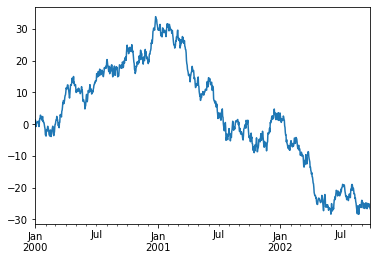

In [163]:
ts.plot()

In [165]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])  
df

,A,B,C,D
2000-01-01,2.132989,0.477859,1.718366,0.164375
2000-01-02,-1.601171,-0.198886,1.039477,0.275119
2000-01-03,0.268698,1.387878,0.882487,0.940801
2000-01-04,0.927873,0.231414,-1.652167,-1.140367
2000-01-05,-1.967289,-0.075913,0.417893,-0.956456
...,...,...,...,...
2002-09-22,-0.974305,-0.275384,-0.875786,-1.747967
2002-09-23,-0.711730,-0.583722,-0.109513,0.859054
2002-09-24,-1.253936,0.400426,-0.425755,-0.389305
2002-09-25,-1.819078,-1.585119,-0.053549,0.586677


In [167]:
df = df.cumsum()
df

,A,B,C,D
2000-01-01,2.132989,0.477859,1.718366,0.164375
2000-01-02,2.664806,0.756832,4.476209,0.603868
2000-01-03,3.465322,2.423683,8.116539,1.984163
2000-01-04,5.193711,4.321948,10.104702,2.224091
2000-01-05,4.954811,6.144300,12.510758,1.507562
...,...,...,...,...
2002-09-22,38635.924296,-13155.817231,14084.124189,-1560.963326
2002-09-23,38681.431954,-13157.763630,14120.565014,-1524.529564
2002-09-24,38725.685675,-13159.309602,14156.580084,-1488.485108
2002-09-25,38768.120318,-13162.440693,14192.541605,-1451.853975


## Getting Data In / Out (데이터 입 / 출력)

In [171]:
df.to_csv('foo.csv')

In [172]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,2.132989,0.477859,1.718366,0.164375
1,2000-01-02,2.664806,0.756832,4.476209,0.603868
2,2000-01-03,3.465322,2.423683,8.116539,1.984163
3,2000-01-04,5.193711,4.321948,10.104702,2.224091
4,2000-01-05,4.954811,6.144300,12.510758,1.507562
...,...,...,...,...,...
995,2002-09-22,38635.924296,-13155.817231,14084.124189,-1560.963326
996,2002-09-23,38681.431954,-13157.763630,14120.565014,-1524.529564
997,2002-09-24,38725.685675,-13159.309602,14156.580084,-1488.485108
998,2002-09-25,38768.120318,-13162.440693,14192.541605,-1451.853975


In [173]:
df.to_hdf('foo.h5','df')

In [174]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,2.132989,0.477859,1.718366,0.164375
2000-01-02,2.664806,0.756832,4.476209,0.603868
2000-01-03,3.465322,2.423683,8.116539,1.984163
2000-01-04,5.193711,4.321948,10.104702,2.224091
2000-01-05,4.954811,6.144300,12.510758,1.507562
...,...,...,...,...
2002-09-22,38635.924296,-13155.817231,14084.124189,-1560.963326
2002-09-23,38681.431954,-13157.763630,14120.565014,-1524.529564
2002-09-24,38725.685675,-13159.309602,14156.580084,-1488.485108
2002-09-25,38768.120318,-13162.440693,14192.541605,-1451.853975


In [175]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [176]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,2.132989,0.477859,1.718366,0.164375
1,2000-01-02,2.664806,0.756832,4.476209,0.603868
2,2000-01-03,3.465322,2.423683,8.116539,1.984163
3,2000-01-04,5.193711,4.321948,10.104702,2.224091
4,2000-01-05,4.954811,6.144300,12.510758,1.507562
...,...,...,...,...,...
995,2002-09-22,38635.924296,-13155.817231,14084.124189,-1560.963326
996,2002-09-23,38681.431954,-13157.763630,14120.565014,-1524.529564
997,2002-09-24,38725.685675,-13159.309602,14156.580084,-1488.485108
998,2002-09-25,38768.120318,-13162.440693,14192.541605,-1451.853975


## Gotchas

In [178]:
if pd.Series([False, True, False])is not None:
      print("I was not None")

I was not None
